In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import sklearn
import scipy as sp

In [2]:
# Data processing into features and labels
data = pd.read_csv("HW2_data.csv")
names = data.columns[0:-1].tolist()
df = data.drop('prognosis',axis=1)
data = data.to_numpy()
size = data.shape[1]
samples = data.shape[0]

x = data[:,:-1]
t = data[:,-1]

In [13]:
# Iterates through each gene, and the expression of the gene in each sample
# Generates a list of p-values comparing expression between good and poor samples for each gene
# Creates a dataframe to sort and rank the final results
p_vals = []
for i in range(30):
    good_values = []
    poor_values = []
    for j in range(samples):
        label = t[j]
        if label == 'GOOD':
            good_values.append(x[j,i])
        else:
            poor_values.append(x[j,i])
    p_vals.append(sp.stats.ttest_ind(good_values,poor_values)[1])
p_rank = pd.DataFrame({"name":names,"p-value":p_vals})
p_rank = p_rank.sort_values(by=['p-value'],ascending=True)
p_rank["p_rank"] = range(1,31)
print(p_rank)

          name   p-value  p_rank
18    34683_at  0.000057       1
25  38840_s_at  0.000084       2
22    38221_at  0.000090       3
23    38839_at  0.000153       4
21    32607_at  0.000153       5
28  31377_r_at  0.000240       6
6     33662_at  0.000279       7
8     41172_at  0.000353       8
13    33809_at  0.000389       9
10  33672_f_at  0.000599      10
4     40131_at  0.001096      11
26    41872_at  0.001110      12
9     39028_at  0.001863      13
5   36559_g_at  0.002130      14
14    39298_at  0.002239      15
1     35291_at  0.002816      16
7     33713_at  0.002898      17
24    35196_at  0.003089      18
19    31578_at  0.003145      19
3   33582_s_at  0.003227      20
27    33741_at  0.003265      21
11    35895_at  0.004132      22
16    32434_at  0.004885      23
0     37086_at  0.004960      24
2     41757_at  0.005688      25
15    32672_at  0.007061      26
12  38673_s_at  0.009134      27
17    41044_at  0.016720      28
20  31989_s_at  0.022757      29
29    3743

In [4]:
# Takes the gene expression matrix, and prognosis labels as inputs
# Generates a list of information gain values for each gene (also known as mutual information)
# Creates a dataframe to sort and rank the final results

from sklearn.feature_selection import mutual_info_classif

ig_results = sklearn.feature_selection.mutual_info_classif(x,t)
ig_rank = pd.DataFrame({"name":names,"ig":ig_results})
ig_rank = ig_rank.sort_values(by=['ig'],ascending=False)
ig_rank["ig_rank"] = range(1,31)
print(ig_results)

[5.87438015e-02 8.18722414e-02 3.50688334e-02 4.59113831e-02
 7.15943547e-02 1.71495802e-01 2.28799396e-02 4.46742683e-02
 5.81309807e-02 4.65526056e-02 9.52191422e-02 5.09977864e-02
 0.00000000e+00 9.75695610e-02 2.52560680e-02 1.13684496e-01
 7.12001969e-02 9.66746566e-04 6.06151286e-02 6.80762700e-02
 0.00000000e+00 6.76848660e-02 8.69146792e-02 6.46947797e-02
 4.27635300e-05 6.77336728e-02 3.63639832e-02 4.72051525e-02
 7.88150261e-02 1.03203064e-01]


Text(0, 0.5, 'Information gain ranks')

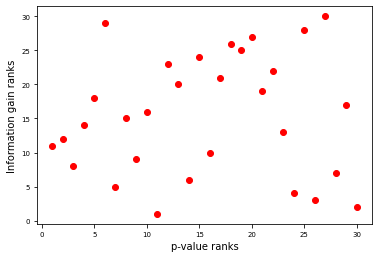

In [35]:
# Plots the ranks of each gene for p-value and information gain against each other.
compare = p_rank.merge(ig_rank,on="name")
plt.plot(compare["p_rank"].tolist(),compare["ig_rank"].tolist(), 'ro')
plt.xlabel('p-value ranks')
plt.ylabel('Information gain ranks')

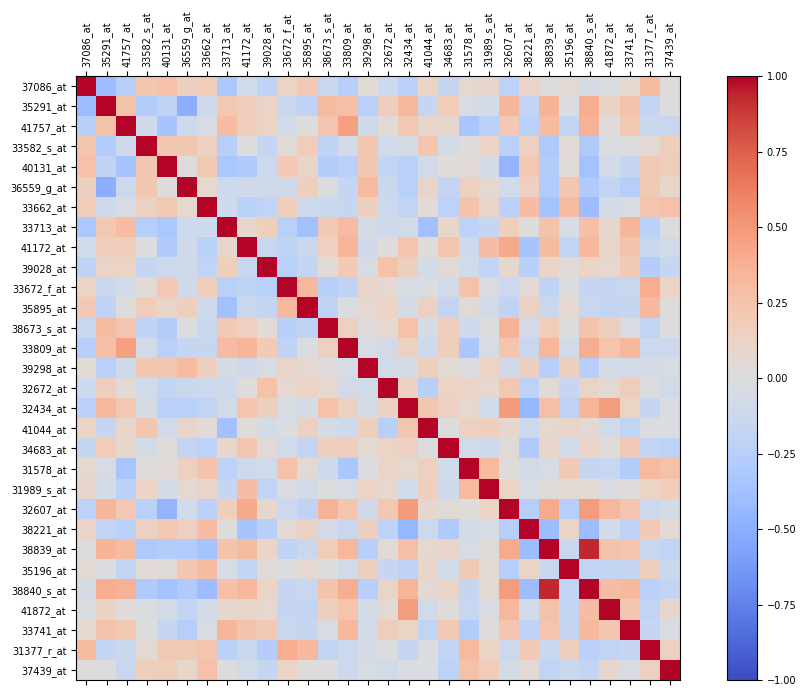

In [7]:
# Calculates the correlation between all 30 genes and presents it as a heatmap
corr = df.corr()
fig = plt.figure(figsize=(12,8), dpi= 100)
plt.rc('xtick', labelsize=7) 
plt.rc('ytick', labelsize=7) 
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,30,1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

Greatest correlation is between 38840s and 38839.

The connection to the earlier section is genes that are correlated would be expected to have a similar rank in terms of p-value or information gain, suggesting that their similar expressions are related to their influence on the prognosis.

Genes whose expression increase and decrease together suggest their products interact in some way, or are part of the same pathway or process.